### Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

#### Condiciones:

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

1. Descarga y prepara los datos. Explica el procedimiento.

In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data/carga de datos
geo_data_0 = pd.read_csv('data/geo_data_0.csv')
geo_data_1 = pd.read_csv('data/geo_data_1.csv')
geo_data_2 = pd.read_csv('data/geo_data_2.csv')

# Exploratory data analysis (EDA) exploracion inicial
print(geo_data_0.info())
print(geo_data_1.info())
print(geo_data_2.info())
print()
print(geo_data_0.head())
print(geo_data_1.head())
print(geo_data_2.head())

# Data cleaning and preparation/ limpieza y preparacion de datos
# Remove 'id' column and select target varible
features_0 = geo_data_0.drop(['id', 'product'], axis=1)
target_0 = geo_data_0['product']

# The cleanin and data preparation for geo_data_1 and geo_data_2 will be perdormed
# inside the function in the next section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

2. Entrena y prueba el modelo para cada región en geo_data_0.csv:

- Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25
- Entrena el modelo y haz predicciones para el conjunto de validación.
- Guarda las predicciones y las respuestas correctas para el conjunto de validación.
- Muestra el volumen medio de reservas predicho y RMSE del modelo.
- Analiza los resultados.
- Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

In [59]:
# Divide data region 0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=42)

# Train the model and make predictions for validation set region 0
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_0 = model_0.predict(features_valid_0)

# Calculate RMSE
rmse_0 = mean_squared_error(target_valid_0, predictions_0, squared=False)

# Predictions_mean
mean_predictions_0 = predictions_0.mean()

print("Region 0 - Evaluacion del model")
print(f"Promedio de reservas predichas: {mean_predictions_0: .2f} mil barriles")
print(f"RMSE: {rmse_0:.2f} mil barriles")

def region_data(data, region_name = 'Region'):

    # Prepare data
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

    # Train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    predictions = model.predict(X_valid)

    # Evaluation
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    mean_prediction = predictions.mean()

    print(f"\n{region_name} Evaluacion del modelo")
    print(f"Promedio de reservas predichas: {mean_prediction: .2f} mil barriles")
    print(f"RMSE: {rmse:.2f} mil barriles\n")

    return rmse, mean_prediction, predictions, y_valid

rmse_1, mean_predictions_1, predictions_1, target_valid_1 = region_data(geo_data_1, "Region 1")
rmse_2, mean_predictions_2, predictions_2, target_valid_2 = region_data(geo_data_2, "Region 2")


Region 0 - Evaluacion del model
Promedio de reservas predichas:  92.40 mil barriles
RMSE: 37.76 mil barriles

Region 1 Evaluacion del modelo
Promedio de reservas predichas:  68.71 mil barriles
RMSE: 0.89 mil barriles


Region 2 Evaluacion del modelo
Promedio de reservas predichas:  94.77 mil barriles
RMSE: 40.15 mil barriles



3. Prepárate para el cálculo de ganancias:

Almacena todos los valores necesarios para los cálculos en variables separadas.

Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

Region_0 - Promedio predicho:  92.398800 mil barriles
No rentable (por debajo del umbral de equilibrio)

Region_1 - Promedio predicho:  68.712878 mil barriles
No rentable (por debajo del umbral de equilibrio)

Region_2 - Promedio predicho:  94.771024 mil barriles
No rentable (por debajo del umbral de equilibrio)



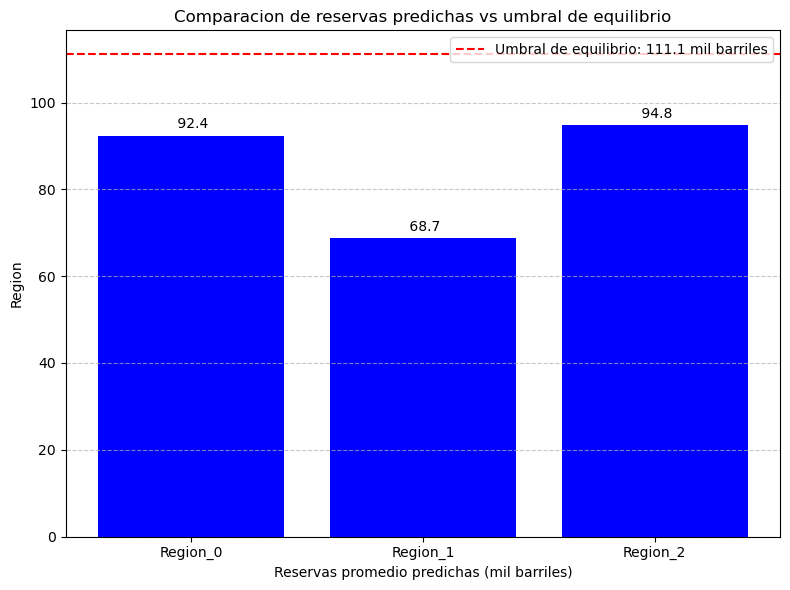

In [60]:
# Values needed for calculations
wells_budget = 100_000_000
wells_count = 200
revenue_per_unit_product = 4500
minimum_profitable_volume = 111.1

# Region predictions mean
region_predictions = {
    'Region_0' : mean_predictions_0,
    'Region_1' : mean_predictions_1,
    'Region_2' : mean_predictions_2,
}

# Show comparisons with break-even point
for region_name, prediction in region_predictions.items():
    print(f"{region_name} - Promedio predicho: {prediction: 2f} mil barriles")
    if prediction >= minimum_profitable_volume:
        print("Rentable (por encima del umbral de equilibrio)")
    else:
        print("No rentable (por debajo del umbral de equilibrio)")
    print()

regions = list(region_predictions)
predicted_means = list(region_predictions.values())

# bar graph
plt.figure(figsize=(8,6))
bars = plt.bar(regions, predicted_means, color = 'blue')
plt.axhline(minimum_profitable_volume, color='red', linestyle='--', label=f'Umbral de equilibrio: {minimum_profitable_volume} mil barriles')

plt.title('Comparacion de reservas predichas vs umbral de equilibrio')
plt.xlabel('Reservas promedio predichas (mil barriles)')
plt.ylabel("Region")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# show values per bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height: 0.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Conclusion:

Hasta ahora, en base a las predicciones generadas ninguna de las 3 regiones alcanza el volumen promedio estimado que se necesita para que el negocio sea rentable (111.1 mil por barril) y cubrir el costo de inversion ($500,000 USD por pozo)/
La region mas cercana al volumen de produccion requerido es la Region 2 con 94.8 y despues la Region 0.

4. Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

- Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').
- Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.
- Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

In [61]:
# Calculates well profits
def wells_profit(predictions, targets, count=200, revenue_per_unit_product=4500):
    # Convert data to pandas Series
    predictions = pd.Series(predictions)
    targets = pd.Series(targets)

    # Select 200 wells indices with highest predictions
    top_indices = predictions.sort_values(ascending=False).head(count).index

    # Real well values
    selected_targets = targets.iloc[top_indices]

    # Calculate the total profit
    total_profit = selected_targets.sum() * revenue_per_unit_product
    return total_profit

# Call the function and print results
profit_region_0 = wells_profit(predictions_0, target_valid_0)
print(f"Ganancia estiamada en Region 0 (top 200 pozos): ${profit_region_0:,.2f}")

profit_region_1 = wells_profit(predictions_1, target_valid_1)
print(f"Ganancia estiamada en Region 1 (top 200 pozos): ${profit_region_1:,.2f}")
profit_region_2 = wells_profit(predictions_2, target_valid_2)
print(f"Ganancia estiamada en Region 2 (top 200 pozos): ${profit_region_2:,.2f}")


Ganancia estiamada en Region 0 (top 200 pozos): $133,591,411.14
Ganancia estiamada en Region 1 (top 200 pozos): $124,150,866.97
Ganancia estiamada en Region 2 (top 200 pozos): $125,985,717.59


Conclusion:

La region propuesta para poder desarollar pozos petroleros es la Region 0 ya que en base a la ganacia estimada usando las predicciones y los objetivos es la que tiene mayores ganancias potenciales de $133,591,411.14.

5. Calcula riesgos y ganancias para cada región:

- Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.
- Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.
- Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. 

¿Coincide tu elección con la elección anterior en el punto 4.3?

In [62]:
# Calculates profits and risks by region
def bootstrap_profit(predictions, targets, n_bootstrap = 1000, sample_size=500, top_wells=200, revenue_per_unit=4500):
    np.random.seed(42)
    profits = []

    for _ in range(n_bootstrap):
        # Sampling with 500 point replacement
        indices = np.random.choice(len(predictions), size=sample_size, replace=True)
        sample_pred = predictions[indices]
        sample_true = targets[indices]
        
        # Selects top 200 wells
        top_indices = np.argsort(sample_pred)[-top_wells:]
        total_profit = sample_true[top_indices].sum() * revenue_per_unit
        profits.append(total_profit)

    return profits

# Analyze the risk
def analyze_risks(profits, budget=100_000_000, region_name = "Region"):
    profits = pd.Series(profits)
    mean_profit = profits.mean()
    confidence_interval = profits.quantile([0.025, 0.975])
    risk = (profits < budget).mean() * 100


    print(f"\n{region_name} - Analisis de riesgo:")
    print(f"\nBeneficio promedio: ${mean_profit:,.2f}")
    print(f"95% intervalo de confianza: [${confidence_interval.iloc[0]:,.2f}, ${confidence_interval.iloc[1]:,.2f}]")
    print(f"Riesgo de no alcanzar presupuesto: {risk:.2f}")
    print(f'Probabilidad de perdidas: {(profits < 0).mean()*100:.2f}%')

    

    return mean_profit, confidence_interval, risk


profits_0 = bootstrap_profit(predictions_0, target_valid_0.values)
profits_1 = bootstrap_profit(predictions_1, target_valid_1.values)
profits_2 = bootstrap_profit(predictions_2, target_valid_2.values)

# Call the function
analyze_risks(profits_0, region_name="Region 0")
analyze_risks(profits_1, region_name="Region 1")
analyze_risks(profits_2, region_name="Region 2")




Region 0 - Analisis de riesgo:

Beneficio promedio: $103,995,754.78
95% intervalo de confianza: [$98,895,321.05, $108,974,603.28]
Riesgo de no alcanzar presupuesto: 6.00
Probabilidad de perdidas: 0.00%

Region 1 - Analisis de riesgo:

Beneficio promedio: $104,520,488.91
95% intervalo de confianza: [$100,616,844.80, $108,453,401.78]
Riesgo de no alcanzar presupuesto: 1.50
Probabilidad de perdidas: 0.00%

Region 2 - Analisis de riesgo:

Beneficio promedio: $103,750,099.03
95% intervalo de confianza: [$98,552,332.73, $108,883,904.04]
Riesgo de no alcanzar presupuesto: 8.00
Probabilidad de perdidas: 0.00%


(103750099.0291533,
 0.025    9.855233e+07
 0.975    1.088839e+08
 dtype: float64,
 8.0)

In [65]:
# Consolidate results
summary_df = pd.DataFrame({
    'Region': ['Region 0', 'Region 1', 'Region 2'],
    'Ganancias promedio': [
        np.mean(profits_0),
        np.mean(profits_1),
        np.mean(profits_2)
    ],
    'Confianza 2.5% ($)': [
        pd.Series(profits_0).quantile(0.025),
        pd.Series(profits_1).quantile(0.025),
        pd.Series(profits_2).quantile(0.025)
    ],
    'Confianza 97.5% ($)': [
        pd.Series(profits_0).quantile(0.975),
        pd.Series(profits_1).quantile(0.975),
        pd.Series(profits_2).quantile(0.975)
    ],
    'Riesgo de perdida (%)': [
        (pd.Series(profits_0) < 0).mean() * 100,
        (pd.Series(profits_1) < 0).mean() * 100,
        (pd.Series(profits_2) < 0).mean() * 100
    ],
    'Riesgo < presupuesto (%)': [
        (pd.Series(profits_0) < 1000_000_000).mean() * 100,
        (pd.Series(profits_1) < 1000_000_000).mean() * 100,
        (pd.Series(profits_2) < 1000_000_000).mean() * 100
    ]
})

# Show Dataframe rounded
display(summary_df.round(2))

,Region,Ganancias promedio,Confianza 2.5% ($),Confianza 97.5% ($),Riesgo de perdida (%),Riesgo < presupuesto (%)
0,Region 0,1.039958e+08,9.889532e+07,1.089746e+08,0.0,100.0
1,Region 1,1.045205e+08,1.006168e+08,1.084534e+08,0.0,100.0
2,Region 2,1.037501e+08,9.855233e+07,1.088839e+08,0.0,100.0


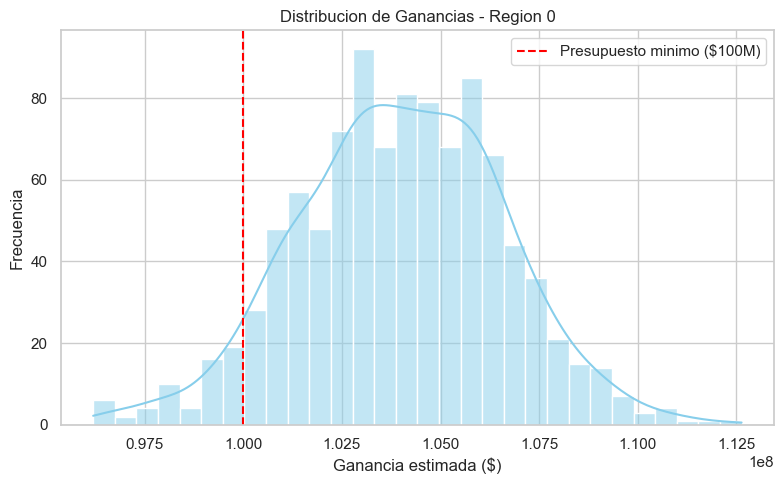

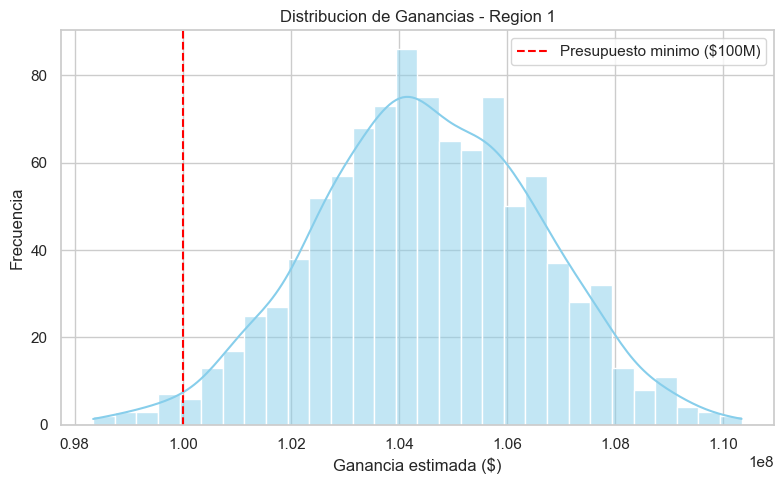

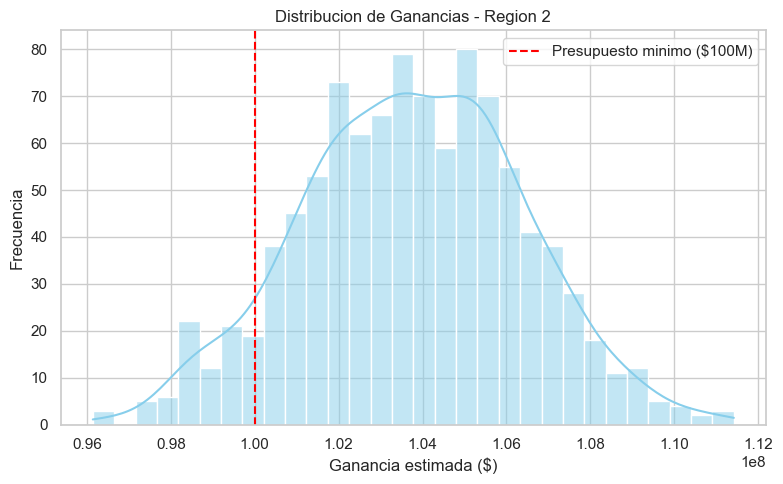

In [67]:
# Visual configuration
sns.set(style='whitegrid')

# Profit list
all_profits = [profits_0, profits_1, profits_2]
region_labels = ['Region 0', 'Region 1', 'Region 2']

# KDE Histogram 
for profits, region in zip(all_profits, region_labels):
    plt.figure(figsize=(8,5))
    sns.histplot(profits, bins=30, kde=True, color='skyblue')
    plt.axvline(
        100_000_000,
        color='red', 
        linestyle='--', 
        label='Presupuesto minimo ($100M)'
        )
    plt.title(f'Distribucion de Ganancias - {region}')
    plt.xlabel('Ganancia estimada ($)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

Despues de analizar los riesgos y ganancias por region, propongo la region 1 para el desarrollo de pozos petroliferos ya que el tiene el mayor beneficio promedio mas alto, al igual que el intervalo de confianza, el riesgo de perdida es el menor 1.50.

No coincide la eleccion con el punto 4.3